In [ ]:
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re


from sklearn.model_selection import train_test_split # Split Data
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics


# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('file.csv')

In [ ]:
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [ ]:
df.tail()


,Unnamed: 0,tweets,labels
219289,219289,Other Software Projects Are Now Trying to Repl...,bad
219290,219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good
219291,219291,chatgpt is being disassembled until it can onl...,bad
219292,219292,2023 predictions by #chatGPT. Nothing really s...,bad
219293,219293,"From ChatGPT, neat stuff https://t.co/qjjUF2Z2m0",neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  219294 non-null  int64 
 1   tweets      219294 non-null  object
 2   labels      219294 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.0+ MB


In [ ]:
df.describe()

,Unnamed: 0
count,219294.000000
mean,109646.500000
std,63304.869303
min,0.000000
25%,54823.250000
50%,109646.500000
75%,164469.750000
max,219293.000000


In [ ]:
df.shape

(219294, 3)

In [ ]:
df.isnull().sum()

Unnamed: 0    0
tweets        0
labels        0
dtype: int64

Total number of sentiments of ChatGPT
labels
bad        107796
good        56011
neutral     55487
Name: count, dtype: int64


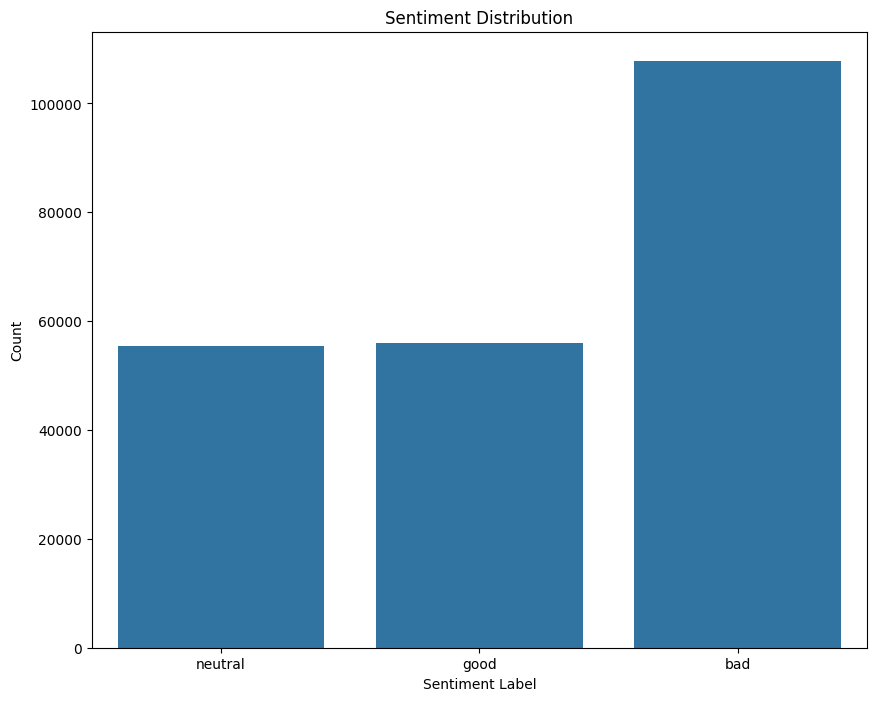

In [ ]:
cprint("Total number of sentiments of ChatGPT")
print(df.labels.value_counts())

sentiment_counts = df['labels'].value_counts()

plt.figure(figsize=(10, 8))
ax = sns.countplot(x='labels', data=df)
ax.set_title("Sentiment Distribution")
ax.set_xlabel("Sentiment Label")
ax.set_ylabel("Count")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['labels'] = encoder.fit_transform(df['labels'])
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,2
1,1,"Try talking with ChatGPT, our new AI system wh...",1
2,2,ChatGPT: Optimizing Language Models for Dialog...,2
3,3,"THRILLED to share that ChatGPT, our new model ...",1
4,4,"As of 2 minutes ago, @OpenAI released their ne...",0


In [ ]:
df=df[(df['labels']==1) | (df['labels']==0)]
df.head()

,Unnamed: 0,tweets,labels
1,1,"Try talking with ChatGPT, our new AI system wh...",1
3,3,"THRILLED to share that ChatGPT, our new model ...",1
4,4,"As of 2 minutes ago, @OpenAI released their ne...",0
5,5,"Just launched ChatGPT, our new AI system which...",1
6,6,"As of 2 minutes ago, @OpenAI released their ne...",0


In [ ]:
df.shape

(163807, 3)

<Axes: xlabel='labels', ylabel='count'>

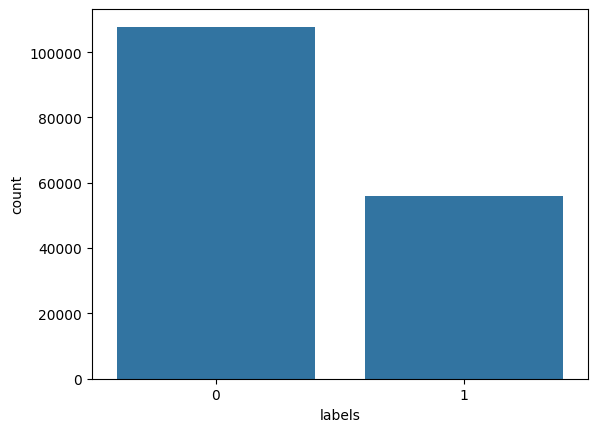

In [ ]:
sns.countplot(x='labels', data= df)

In [ ]:
df['length'] = df['tweets'].apply(lambda x: len(x))

In [ ]:
df.head()

,Unnamed: 0,tweets,labels,length
1,1,"Try talking with ChatGPT, our new AI system wh...",1,139
3,3,"THRILLED to share that ChatGPT, our new model ...",1,188
4,4,"As of 2 minutes ago, @OpenAI released their ne...",0,139
5,5,"Just launched ChatGPT, our new AI system which...",1,142
6,6,"As of 2 minutes ago, @OpenAI released their ne...",0,171


In [ ]:
import string
df['nopunc'] = df['tweets'].apply(lambda x: [a for a in x if a not in string.punctuation])
df['nopunc'] =df['nopunc'].apply(''.join)
df.head()

,Unnamed: 0,tweets,labels,length,nopunc
1,1,"Try talking with ChatGPT, our new AI system wh...",1,139,Try talking with ChatGPT our new AI system whi...
3,3,"THRILLED to share that ChatGPT, our new model ...",1,188,THRILLED to share that ChatGPT our new model o...
4,4,"As of 2 minutes ago, @OpenAI released their ne...",0,139,As of 2 minutes ago OpenAI released their new ...
5,5,"Just launched ChatGPT, our new AI system which...",1,142,Just launched ChatGPT our new AI system which ...
6,6,"As of 2 minutes ago, @OpenAI released their ne...",0,171,As of 2 minutes ago OpenAI released their new ...


In [ ]:
df.head()

,Unnamed: 0,tweets,labels,length,nopunc
1,1,"Try talking with ChatGPT, our new AI system wh...",1,139,Try talking with ChatGPT our new AI system whi...
3,3,"THRILLED to share that ChatGPT, our new model ...",1,188,THRILLED to share that ChatGPT our new model o...
4,4,"As of 2 minutes ago, @OpenAI released their ne...",0,139,As of 2 minutes ago OpenAI released their new ...
5,5,"Just launched ChatGPT, our new AI system which...",1,142,Just launched ChatGPT our new AI system which ...
6,6,"As of 2 minutes ago, @OpenAI released their ne...",0,171,As of 2 minutes ago OpenAI released their new ...


In [ ]:
df.sample(5)


,Unnamed: 0,tweets,labels,length,nopunc
161238,161238,I gave ChatGPT a matplotlib script and asked i...,0,269,I gave ChatGPT a matplotlib script and asked i...
192548,192548,I asked ChatGPT to write a viral Merry Christm...,1,103,I asked ChatGPT to write a viral Merry Christm...
187746,187746,cbf writing Christmas cards? just use ChatGPT,0,45,cbf writing Christmas cards just use ChatGPT
112301,112301,The thing to understand about ChatGPT is it's ...,0,209,The thing to understand about ChatGPT is its n...
39109,39109,#ChatGPT has been so much fun today. If only i...,1,122,ChatGPT has been so much fun today If only it ...


In [ ]:
X=df['nopunc']
y=df['labels']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
pred=nb.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     32367
           1       0.82      0.92      0.87     16776

    accuracy                           0.91     49143
   macro avg       0.89      0.91      0.90     49143
weighted avg       0.91      0.91      0.91     49143



In [ ]:
log = LogisticRegression()
log.fit(X_train, y_train)

preds = log.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     32367
           1       0.96      0.93      0.95     16776

    accuracy                           0.96     49143
   macro avg       0.96      0.96      0.96     49143
weighted avg       0.96      0.96      0.96     49143



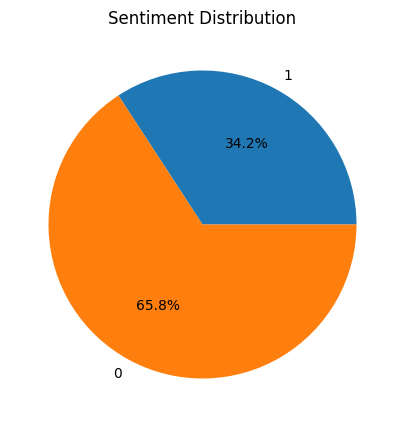

In [ ]:
labels = df['labels']

sentiment_counts = {}
for label in labels:
  if label not in sentiment_counts:
    sentiment_counts[label] = 0
  sentiment_counts[label] += 1

plt.figure(figsize=(7, 5))
plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), autopct="%1.1f%%")
plt.title("Sentiment Distribution")
plt.show()


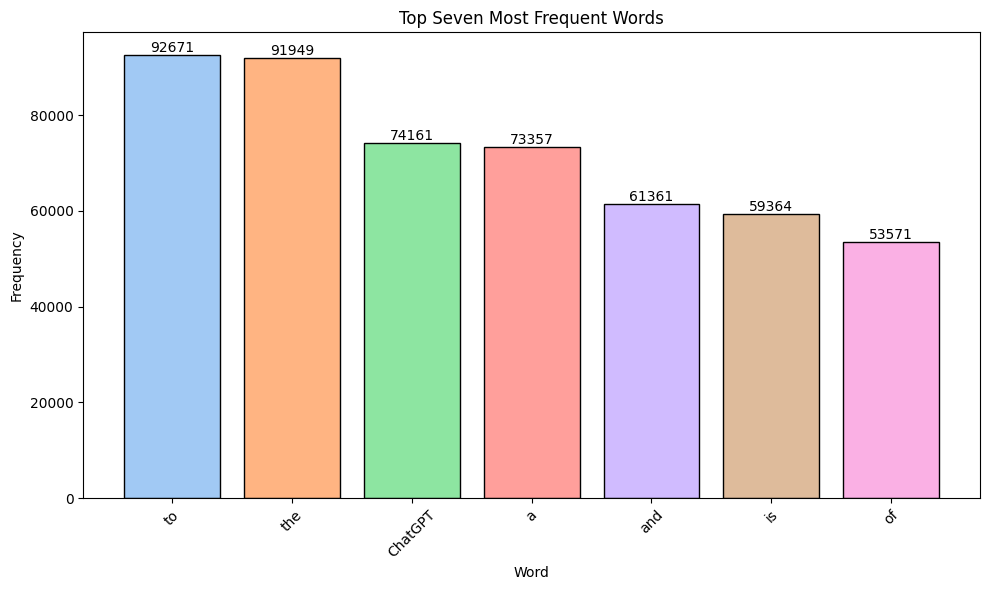

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

all_tweets = ' '.join(df['tweets'])

word_counts = Counter(all_tweets.split())

top_ten_words = word_counts.most_common(7)

words = [word[0] for word in top_ten_words]
frequencies = [word[1] for word in top_ten_words]

colors = sns.color_palette("pastel")

plt.figure(figsize=(10, 6))
bars = plt.bar(words, frequencies, color=colors, edgecolor='black')
plt.title("Top Seven Most Frequent Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             round(bar.get_height(), 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


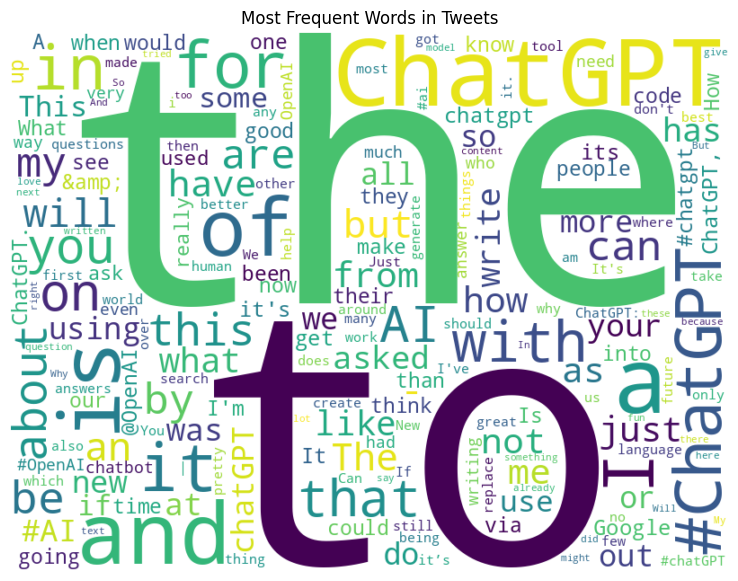

In [ ]:
words = []
for tweet in df['tweets']:
  words.extend(tweet.split())

word_counts = {}
for word in words:
  if word not in word_counts:
    word_counts[word] = 0
  word_counts[word] += 1

sorted_word_counts = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)

wordcloud = WordCloud(width=800, height=600, background_color="white").generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Tweets")
plt.show()


In [ ]:
!pip install Pillow

In [ ]:
from PIL import Image
import numpy as np

mask = np.array(Image.open("/content/cloud.jpg"))

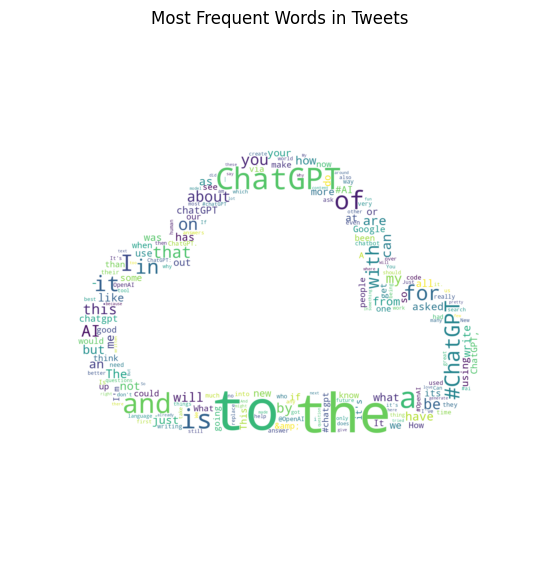

In [ ]:
words = []
for tweet in df['tweets']:
    words.extend(tweet.split())

word_counts = {}
for word in words:
    if word not in word_counts:
        word_counts[word] = 0

sorted_word_counts = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)

wordcloud = WordCloud(width=800, height=600, background_color="white", mask=mask).generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Tweets")
plt.show()

In [ ]:
from PIL import Image
import numpy as np

mask1 = np.array(Image.open("/content/sunflower.jpg"))

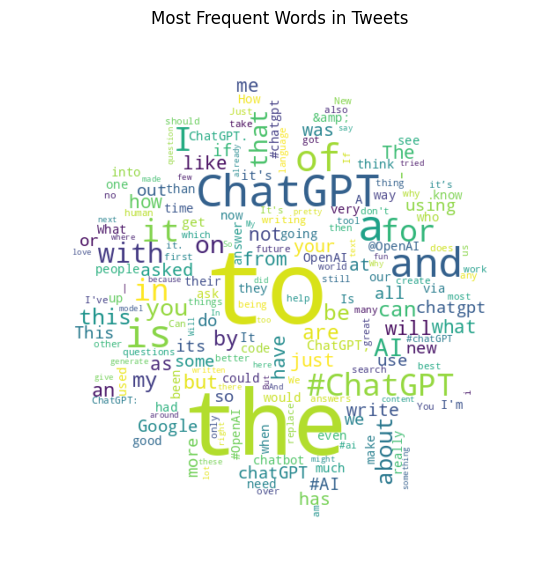

In [ ]:
words = []
for tweet in df['tweets']:
    words.extend(tweet.split())

word_counts = {}
for word in words:
    if word not in word_counts:
        word_counts[word] = 0

sorted_word_counts = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)

wordcloud = WordCloud(width=800, height=600, background_color="white", mask=mask1).generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Tweets")
plt.show()


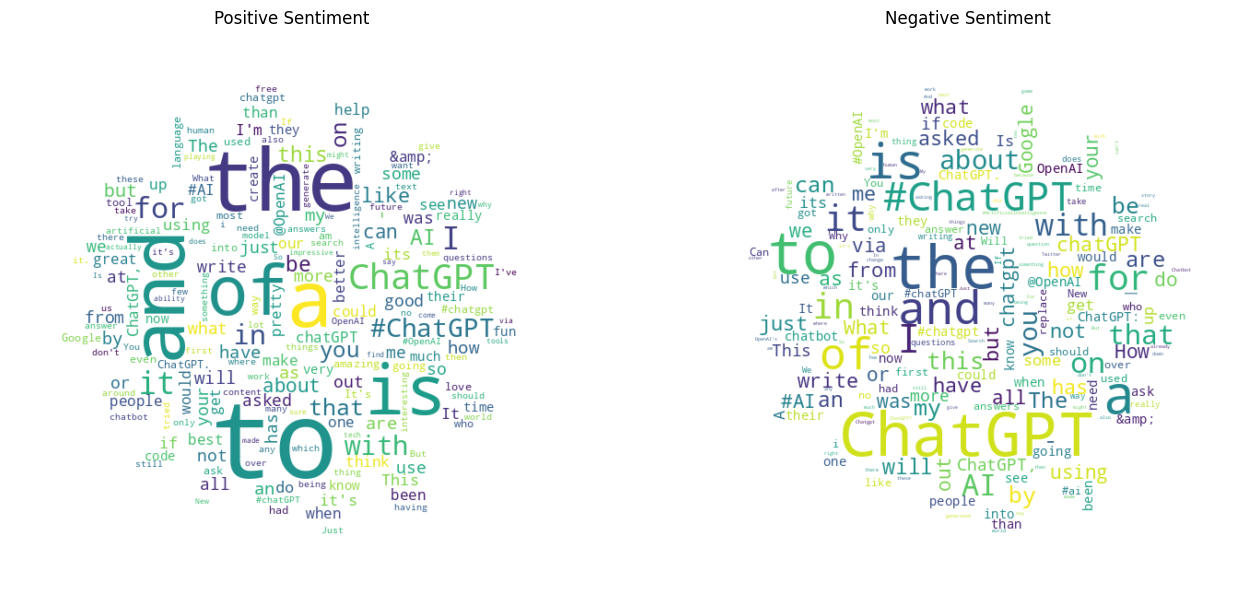

In [ ]:
mask_positive = np.array(Image.open("/content/sunflower.jpg"))

positive_tweets = df[df['labels'] == 1]['tweets']
words_positive = []
for tweet in positive_tweets:
    words_positive.extend(tweet.split())

word_counts_positive = {}
for word in words_positive:
    if word not in word_counts_positive:
        word_counts_positive[word] = 0
    word_counts_positive[word] += 1

sorted_word_counts_positive = sorted(word_counts_positive.items(), key=lambda item: item[1], reverse=True)

wordcloud_positive = WordCloud(width=800, height=600, background_color="white", mask=mask_positive).generate_from_frequencies(word_counts_positive)

mask_negative = np.array(Image.open("/content/sunflower.jpg"))

negative_tweets = df[df['labels'] == 0]['tweets']
words_negative = []
for tweet in negative_tweets:
    words_negative.extend(tweet.split())

word_counts_negative = {}
for word in words_negative:
    if word not in word_counts_negative:
        word_counts_negative[word] = 0
    word_counts_negative[word] += 1

sorted_word_counts_negative = sorted(word_counts_negative.items(), key=lambda item: item[1], reverse=True)

wordcloud_negative = WordCloud(width=800, height=600, background_color="white", mask=mask_negative).generate_from_frequencies(word_counts_negative)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment")

plt.show()


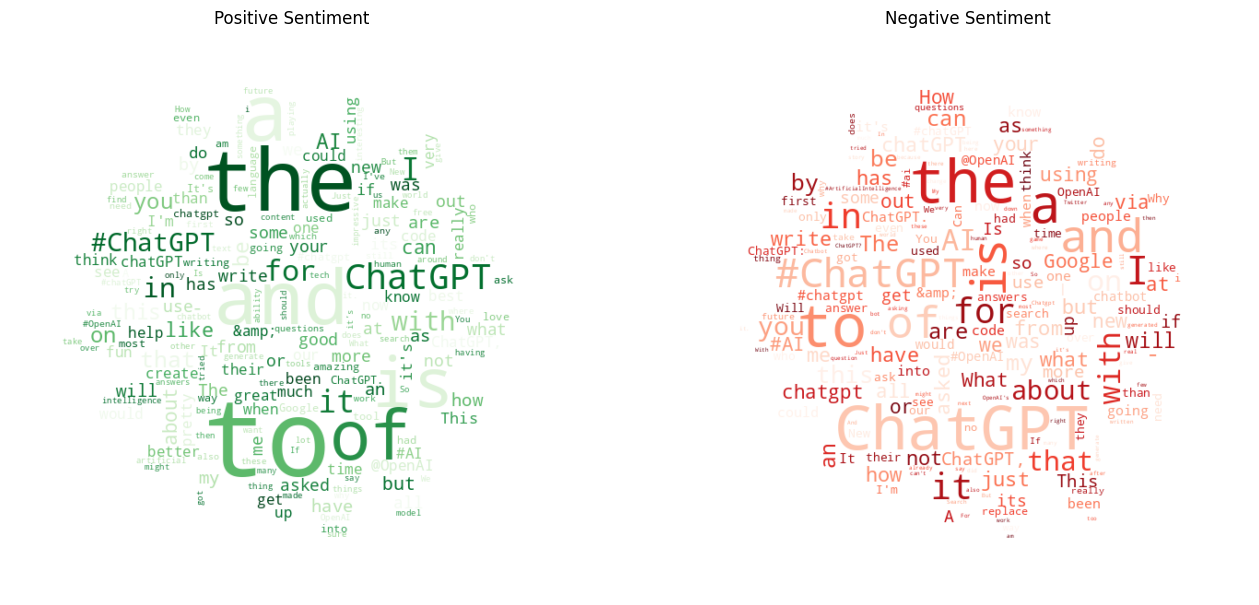

In [ ]:
wordcloud_positive = WordCloud(width=800, height=600, background_color="white", mask=mask_positive, colormap='Greens').generate_from_frequencies(word_counts_positive)

wordcloud_negative = WordCloud(width=800, height=600, background_color="white", mask=mask_negative, colormap='Reds').generate_from_frequencies(word_counts_negative)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment")

plt.show()


In [ ]:
terms = ['love', 'happy', 'sad', 'angry']

term_counts = []
term_rates = []

for term in terms:

  count = df['tweets'].str.count(term).sum()

  rate = count / df['length'].sum()

  term_counts.append(count)

term_data = {'Term': terms, 'Count': term_counts, 'Rate': term_rates}

print(term_df.to_string())


    Term  Count      Rate
0   love   2477  0.000106
1  happy    431  0.000018
2    sad    394  0.000017
3  angry     66  0.000003


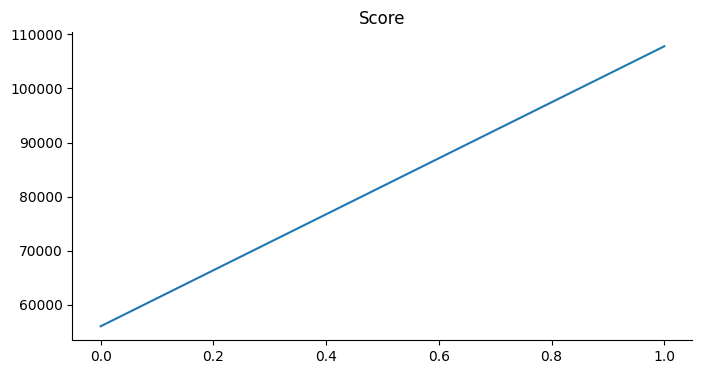

In [ ]:
from matplotlib import pyplot as plt
df_pol['Score'].plot(kind='line', figsize=(8, 4), title='Score')
plt.gca().spines[['top', 'right']].set_visible(False)